Fit Time:0:00:06.424553


,Cumulative Variance Ratio,Explained Variance Radio
0,0.097489,0.097489
1,0.169092,0.071603
2,0.230551,0.061459
3,0.284344,0.053793
4,0.333287,0.048943
...,...,...
304,0.986983,0.000131
305,0.987113,0.000130
306,0.987242,0.000129
307,0.987370,0.000128


Number of Components (95% explained): 178


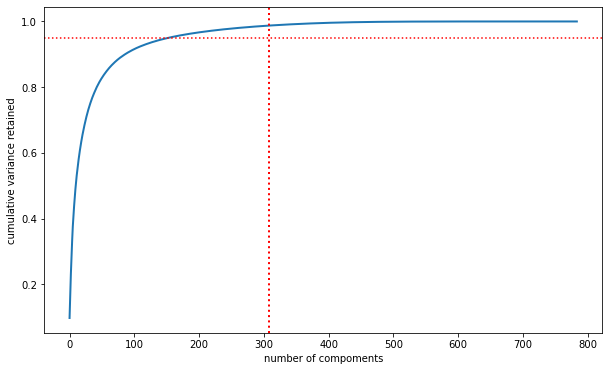

PCA Fit Time: 0:00:03.607878
RandomForestClassifier Fit Time: 0:01:10.597798


In [13]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
# from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.decomposition import PCA
from IPython.display import display
from datetime import datetime

def GetFileOutPutName(prefix):
  #  return 'solution.csv'
  return 'Kaggle-Submission\\' + prefix + '-' + datetime.now().strftime("%Y%m%d-%I%M%S%p") + '.csv'

outputFile = "Unsupervised-Learning"

digitRecognizer_train = pd.read_csv("sampledata/train.csv")
digitRecognizer_test = pd.read_csv("sampledata/test.csv")


def GetFileOutPutName(prefix):
  #  return 'solution.csv'
  return 'Kaggle-Submission\\' + prefix + '-' + datetime.now().strftime("%Y%m%d-%I%M%S%p") + '.csv'


digitRecognizer_results = pd.DataFrame(['ImageId','Label'])

digitRecognizer_test_results = pd.concat([pd.DataFrame([i], columns=['ImageId','Label']) for i in digitRecognizer_test.iloc[1:].iterrows()],
          ignore_index=True)
digitRecognizer_test_results['Label'] = "2"
# digitRecognizer_test_results[len(digitRecognizer_test_results.index)] = [rowcount]

imagelength = len(digitRecognizer_test)

df2 = pd.DataFrame({'ImageId': [imagelength],
                    'Label' : ['2']})

digitRecognizer_test_results = pd.concat([digitRecognizer_test_results, df2], ignore_index = True, axis = 0)

X = digitRecognizer_train.drop(['label'],axis=1).values
y = digitRecognizer_train['label'].values
Q = digitRecognizer_test.values

classifierType = "PCA"

if (classifierType == "RandomForestClassifer"):
  regr = RandomForestClassifier(n_estimators=32, max_depth=3, random_state=0)
  start = datetime.now()
  regr.fit(X, y)
  end = datetime.now()
  print(f'RandomForestClassifier Fit Time: {end-start}')
  predictions = regr.predict(Q).round(decimals=0).astype(int)
  score = regr.score(X,y)
  print(score)
  digitRecognizer_test_results["Label"] = predictions
elif(classifierType == "PCA"):
  start = datetime.now()
  pca = PCA(n_components = 784)
  pca.fit(X)
  end = datetime.now()
  print(f'Fit Time:{end-start}')

  evr = pca.explained_variance_ratio_
  cvr = np.cumsum(pca.explained_variance_ratio_)
  pca_df = pd.DataFrame()
  pca_df['Cumulative Variance Ratio'] = cvr
  pca_df['Explained Variance Radio'] = evr
  display(pca_df.head(309))

  counter=0

  for i in range(len(cvr)):
    if cvr[i] >= 0.96:
      counter = counter
      print(f'Number of Components (95% explained): {counter}')
      break
    else:
      counter = counter + 1

  #plot
  plt.figure(1, figsize=(10, 6))
  plt.clf()
  plt.plot(np.cumsum(pca.explained_variance_ratio_), linewidth=2)
  plt.axvline(linewidth=2, color='r', linestyle = ':', x=308, ymin=0, ymax=1)
  plt.xlabel("number of compoments")
  plt.ylabel("cumulative variance retained")
  plt.savefig("pca_cumulative_variance.png")
  plt.axhline(y = 0.95, color = 'r', linestyle = ':')
  plt.show() 

  #PCA using components that explain 95% of variance
  pca = PCA(n_components=99) #153 from the loop used above
  start = datetime.now()
  pca.fit(X)
  end = datetime.now()
  print(f'PCA Fit Time: {end-start}')
  X_train_scaled_pca = pca.transform(X)
  X_test_scaled_pca = pca.transform(Q) 

  #random forest model using the PCA components
  random_forest_clf_pca = RandomForestClassifier()
  start = datetime.now()
  random_forest_clf_pca.fit(X_train_scaled_pca, y)
  end = datetime.now()
  print(f'RandomForestClassifier Fit Time: {end-start}') 

  #predictions
  y_pred = random_forest_clf_pca.predict(X_test_scaled_pca)
  digitRecognizer_test_results["Label"] = y_pred

 
filename = GetFileOutPutName(outputFile + classifierType)
digitRecognizer_test_results.to_csv(filename, index=False) 


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


None

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


None

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


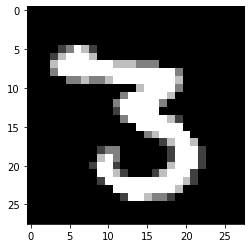

In [21]:
#Digit Data Recognizer EOD

import pandas as pd
import numpy as np 

digitRecognizer_train = pd.read_csv("sampledata/train.csv")
digitRecognizer_test = pd.read_csv("sampledata/test.csv")

display(digitRecognizer_train.head())
display(digitRecognizer_train.info())
display(digitRecognizer_train.isna().sum())
display(digitRecognizer_train.describe())

display(digitRecognizer_test.head())
display(digitRecognizer_test.info())
display(digitRecognizer_test.isna().sum())
display(digitRecognizer_test.describe())

# examine a specific record
# see the overall pixels - to compare across the different models
data = np.matrix(digitRecognizer_train)
output = data[:, 0]
data = np.delete(data, 0, 1)
img = data[13].reshape(28,28) #data[1] is record 1, you can update that number to see a specific record

#displaying the image
plt.imshow(img, cmap="gray") 
plt.imsave('test-image.jpg', img, cmap="gray")



In [3]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
from datetime import datetime
from sklearn.cluster import MiniBatchKMeans

digitRecognizer_train = pd.read_csv("sampledata/train.csv")
digitRecognizer_test = pd.read_csv("sampledata/test.csv")

# from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans

def infer_cluster_labels(kmeans, actual_labels):
    inferred_labels = {}

    for i in range(kmeans.n_clusters):
        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)
        # append actual labels for each point in cluster
        labels.append(actual_labels[index])
        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))
        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i] 

    return inferred_labels


def infer_data_labels(X_labels, cluster_labels):
     # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key

    return predicted_labels



kmeans = KMeans(n_clusters=10, random_state=0)
print(kmeans.n_clusters)

kmeans.fit(X)

print('after fitting')
print(kmeans.n_clusters)

cluster_labels = infer_cluster_labels(kmeans, y)
X_clusters = kmeans.predict(Q)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)

digitRecognizer_test_results["Label"] = predicted_labels
classifierType = "Kmeans"
 
filename = GetFileOutPutName(outputFile + classifierType)
digitRecognizer_test_results.to_csv(filename, index=False) 




10
after fitting
10
